## Heart Disease Predictions Using Supervised Learning
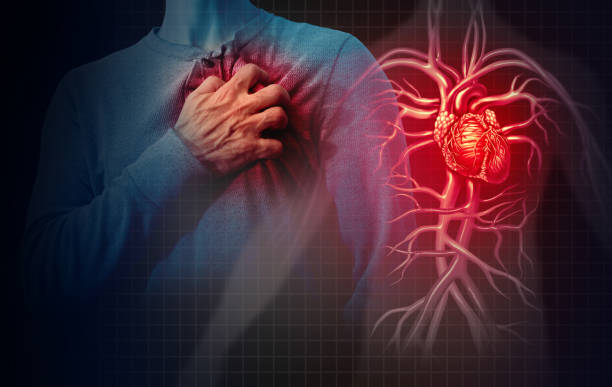 


This project looks at building a supervised learning model to predict whether a patient would develop a heart disease or not, based on various features such as age, blood pressure, cholesterol level etc. The following processes will be used; data cleaning, exploratory analysis, data preprocessing or feature engineering, model development and evaluation.

##### Import the necessary libraries to be used for analysis and model development

In [1]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # normalizes the data between o and 1

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
# Load the Dataset

df = pd.read_csv(r"C:\Users\Paago Anthony\Desktop\10lytics\heart.csv")
df.head() # Returns the first five rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Features in the dataset and meaning:

- age - age in years 
- sex - (1 = male; 0 = female)
- cp - chest pain type(1: typical angina, 2. atypical angina, 3. non-anginal pain, 4. asymptomatic 
- trestbps - resting blood pressure (in mmHg on admission to the hospital)
- chol - serum cholesterol in mg/dl (), 
- fbs - (fasting blood sugar >120mg/dl) (1 =true; 0 =false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved                      
- exang - exercise-induced angina  
- oldpeak - ST depression induced by exercise relativeto rest 
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels colored by flourosopy
- thal - 3 = normal;6 = fixed defect; 7 = reversible defect
- target - have disease or not (1 =yes; 0 =no)

The above shows the meaning of the features (columns) of the dataset. However, for better understanding and flow of the data analysis, the features will be renamed

In [5]:
# For better understanding and flow of data analysis, rename some of the columns

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_pressure', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info() # display the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_pressure   303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
df.describe() # summary statistics of the dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_pressure     0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


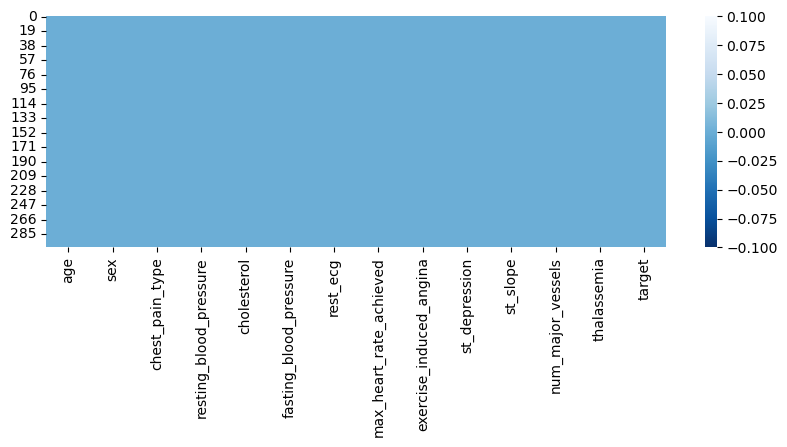

In [8]:
print(df.isnull().sum()) # To check if there are null or missing values in the dataset

# visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

#### Exploratory Data Analysis

##### Univariate Analysis
Using boxplot to check for outliers in some of the features

<Axes: xlabel='thalassemia'>

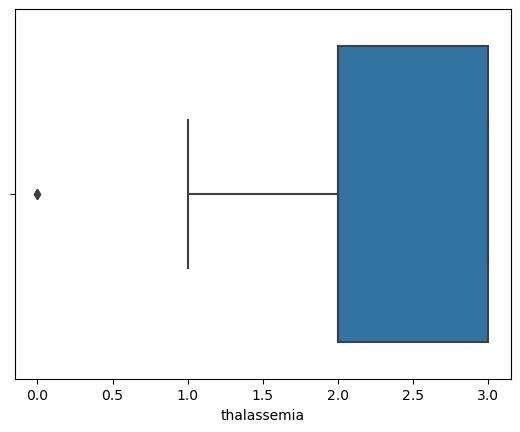

In [11]:
# Check for outliers
sns.boxplot(x=df['thalassemia'])


<Axes: xlabel='cholesterol'>

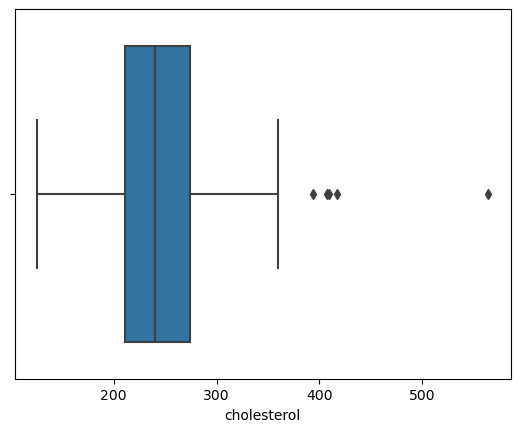

In [12]:
sns.boxplot(x=df['cholesterol'])

In [13]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_pressure', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='resting_blood_pressure'>

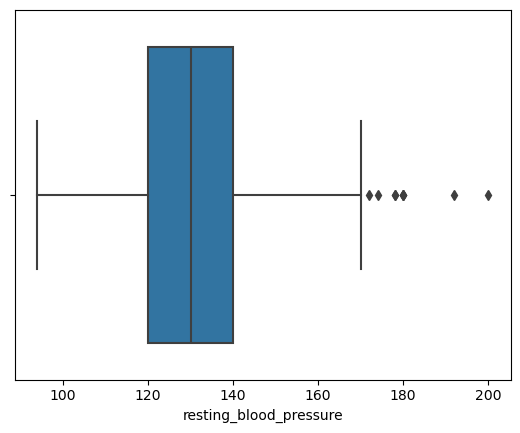

In [14]:
sns.boxplot(x=df['resting_blood_pressure'])

<Axes: xlabel='max_heart_rate_achieved'>

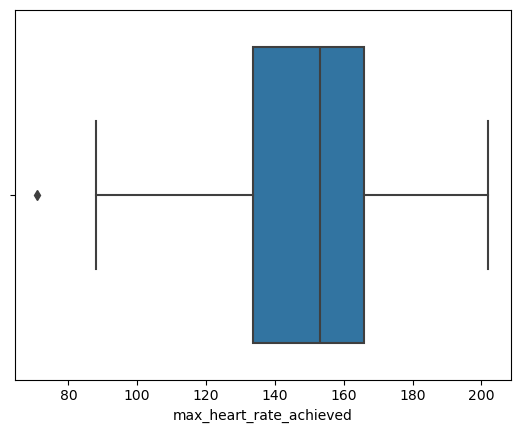

In [15]:
sns.boxplot(x=df['max_heart_rate_achieved'])

Univariate analysis for the above features show outliers are present, and needs to be normalized to have a better performing model

We can categorize the patient age, group the gender and determine the presence of angina pain for the patients to gain more insights into the dataset

Text(0.5, 1.0, 'Patient Distribution Across Different Age Groups')

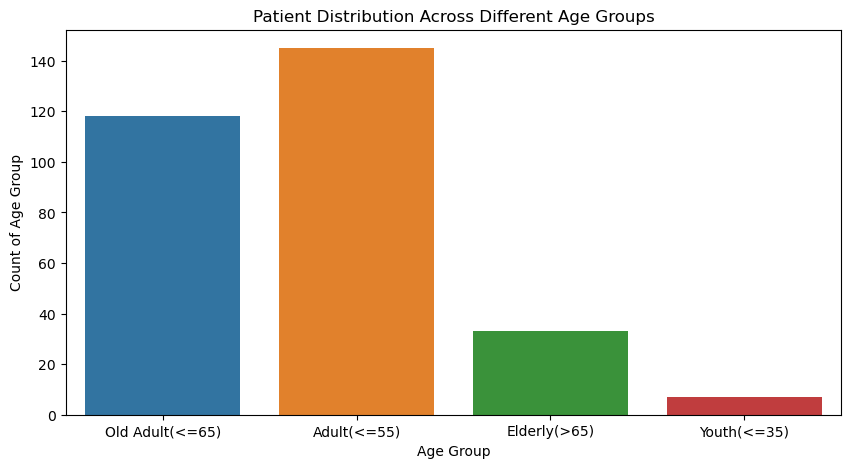

In [23]:
# Data visualization
# Age_bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Patient Distribution Across Different Age Groups')

In [25]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


Text(0.5, 1.0, 'Distribution of Patients by Gender')

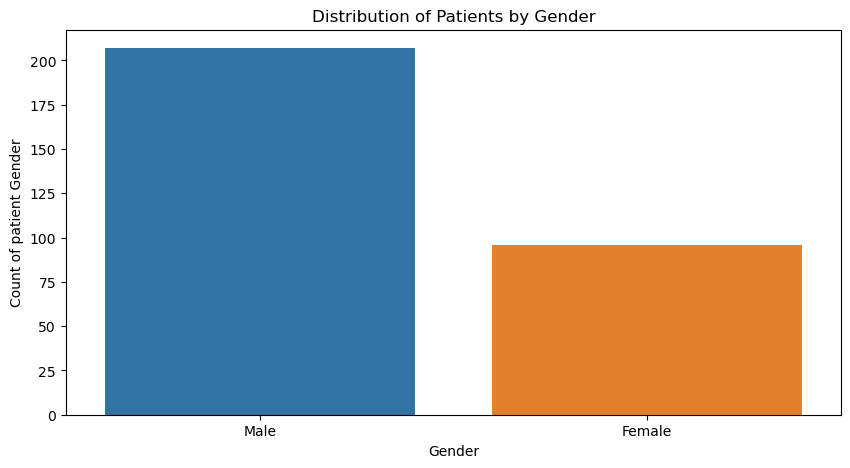

In [29]:
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
df['gender'] = df['sex'].apply(gender)

# Investigating the number of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Distribution of Patients by Gender')

##### Using a pie chart to evaluate the distribution of gender

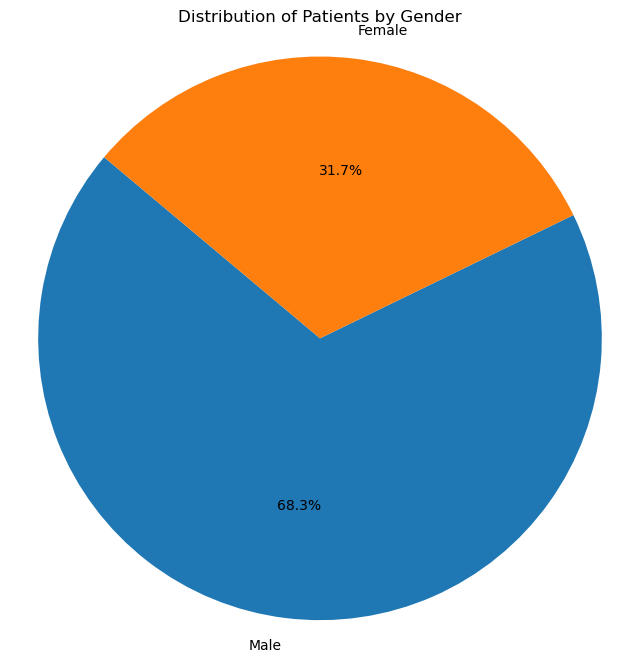

In [35]:
# Calculate the count of each gender
gender_counts = df['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Count of Patients according to chest pain type')

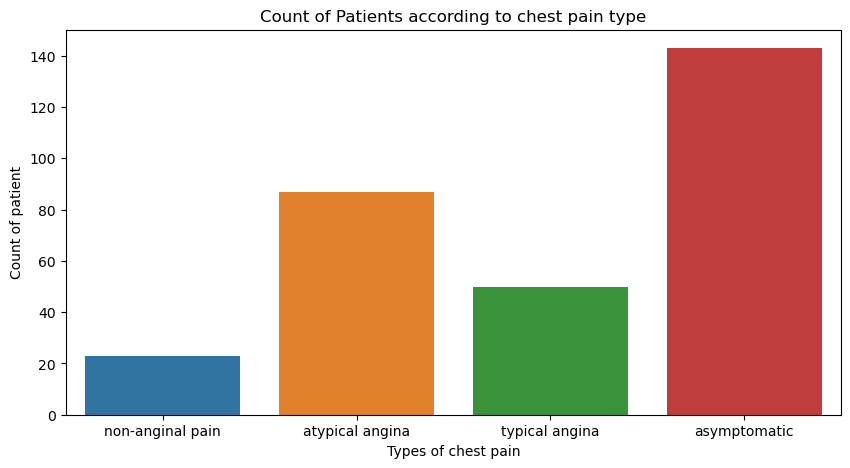

In [39]:
# Data Visulaization
# chest pain type (1. typical angina, 2. atypical angina, 3. non-anginal pain, 4. asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# Investigating the types of chest pain of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient')
plt.title('Count of Patients according to chest pain type')

In [42]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


##### Looking at the analysis above, it can be deduced that
- Patients are more of adults and elderly
- 68.3% are male while 31.7% are female
- A large number of patients are asymptomatic, with a smaller group with atypical angina pain

##### Evaluating the target column to determine the number of patients who may have heart disease. Target 1 = 'Yes', when there is a likelihood of a heart disease; target 2 = 'No', when there is no likelihood of a heart disease.

label
Yes    165
No     138
Name: count, dtype: int64


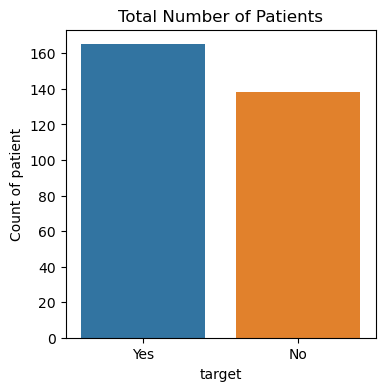

In [46]:
def label(tg):  # Investigating the target column
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df['label'] = df['target'].apply(label)

# Total patient in each category
print(df["label"].value_counts())

# Investigating the targets of patients
plt.figure(figsize = (4, 4))
sns.countplot(x='label', data=df)
plt.xlabel('target')
plt.ylabel('Count of patient')
plt.title('Total Number of Patients');

#### Bivariate Analysis
Comparing the various features of the data with the label or target column

In [49]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


Text(0.5, 1.0, 'Distribution of Patients by Age Group and Label')

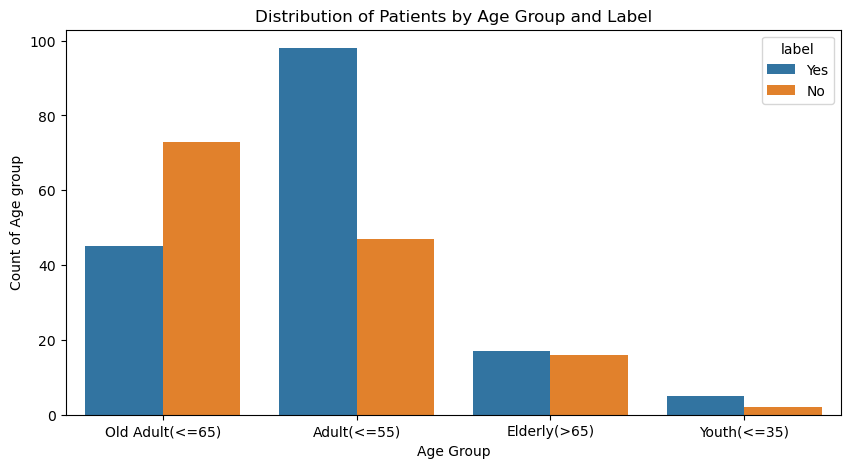

In [51]:
 # Investigating the age group of patients by the target feature

plt.figure(figsize =(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age group')
plt.title('Distribution of Patients by Age Group and Label')


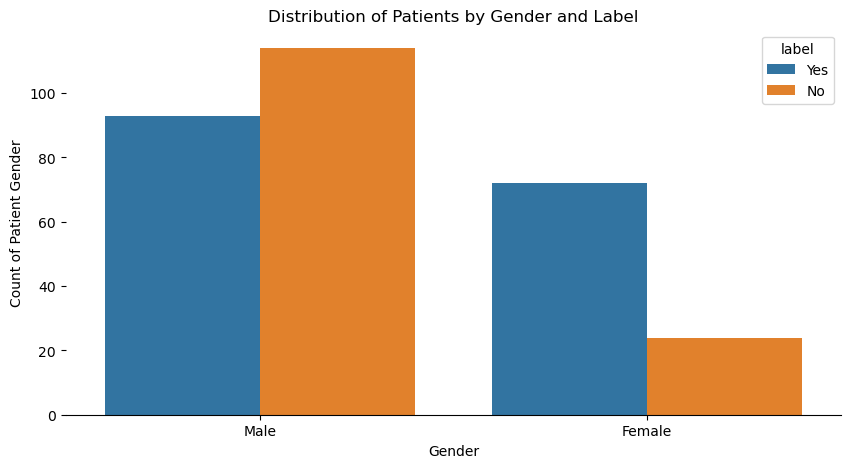

In [53]:
# Investigating the gender of patients by the target feature

plt.figure(figsize =(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Distribution of Patients by Gender and Label')

ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.show()

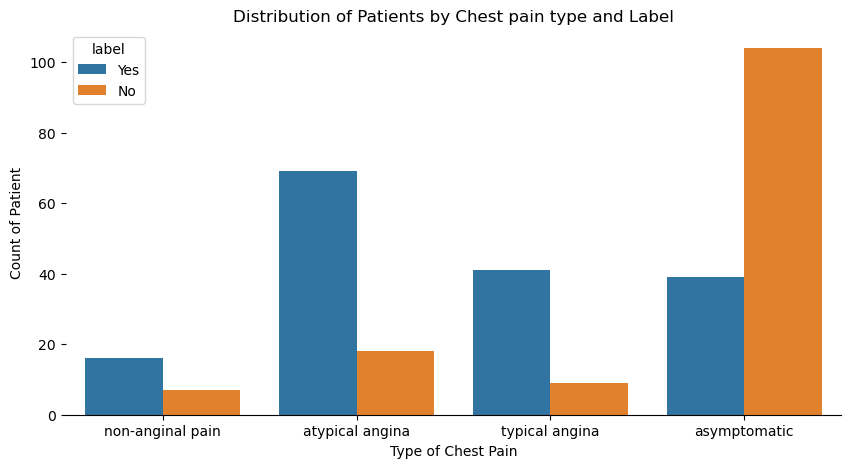

In [55]:
# Investigating the chest pain type of patients by the target feature

plt.figure(figsize =(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Patient')
plt.title('Distribution of Patients by Chest pain type and Label')

ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.show()

The above bivariate analysis shows that adults patients developed a heart attack compared to younger patients. Also, though patients in the different chest pain type, including asymptomatic patients developed heart disease, patients with typical and atypical angina pain are more.

#### Multivariate Analysis

In [59]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


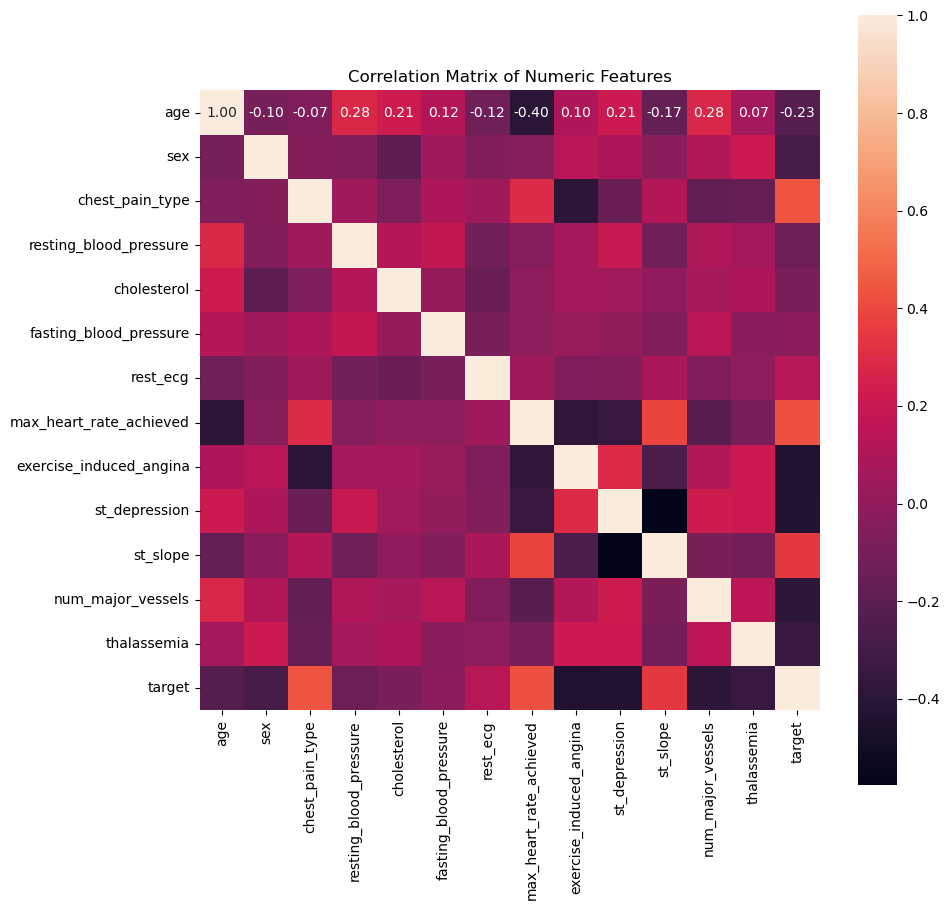

In [61]:
# Correlation between target and other variables in the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 10))
hm = sns.heatmap(numeric_df.corr(), cbar=True, annot=True, square=True, fmt= '.2f', annot_kws={'size':10})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Feature Engineering and Data Pre-processing
- Preparing the data for training
- Remove the created columns
- identify the input and the target or label column
- Normalize the data using the MinMaxScaler

In [64]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [66]:
# 1. Remove the columns created [ age_bracket, gender, cp_cat, label] and the target column. It's not needed for the machine learning model
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_pressure', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]
label = df[['target']]

In [68]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [72]:
df1.dtypes # Check the data types cos machine learning models work with numbers

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_pressure       int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [74]:
# Deal with outliers - resting_blood_pressure, Cholesterol, thalassemia

# Normalize the data

scaler = MinMaxScaler()

df1["scaled_RBP"] = scaler.fit_transform(df1[['resting_blood_pressure']].values.reshape(-1, 1))
df1["scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1["scaled_max_heart_rate"] = scaler.fit_transform(df1[['max_heart_rate_achieved']].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

C:\Users\Paago Anthony\AppData\Local\Temp\ipykernel_19540\2053905282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["scaled_RBP"] = scaler.fit_transform(df1[['resting_blood_pressure']].values.reshape(-1, 1))
C:\Users\Paago Anthony\AppData\Local\Temp\ipykernel_19540\2053905282.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
C:\Users\Paago Anthony\AppData\Local\Temp\ipykernel_19540\2053905282.py:9: SettingWithCo

,age,sex,chest_pain_type,fasting_blood_pressure,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


#### Machine Learning
- Split the data into train and test sets
- Train the data using different models
- Perform evalation metric on the trained model

In [77]:
# Split the dataset into training and testing sets - X = Questions, y = Answers

x_train, x_test = train_test_split(df1, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(label, test_size=0.2, random_state=42)

In [79]:
x_train.head(3)

,age,sex,chest_pain_type,fasting_blood_pressure,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [81]:
y_train.head(3)

,target
132,1
202,0
196,0


In [83]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
ly_pred


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


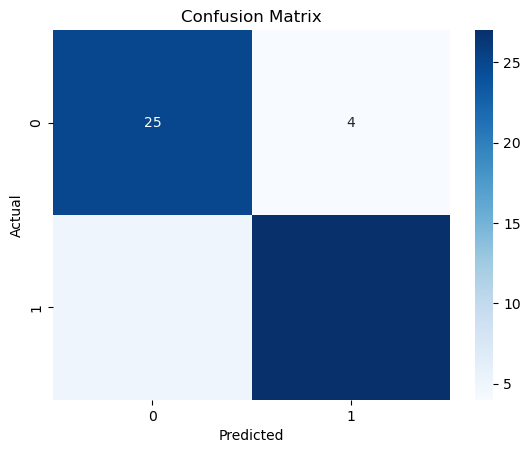

In [89]:
# Create a confusion matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [91]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

C:\Anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classifier
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1-score: 0.8923076923076924
AUC-ROC: 0.8841594827586207


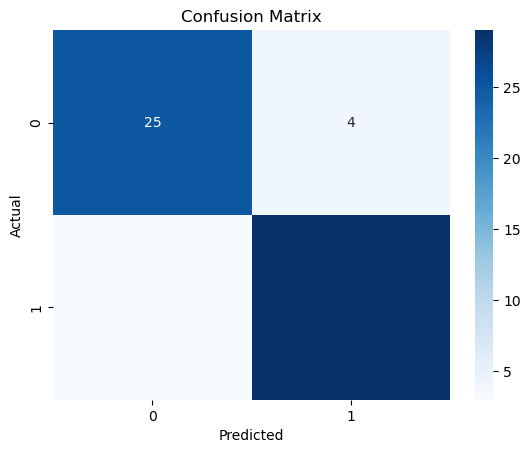

In [93]:
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Save the model so you can load them when needed

In [96]:
import joblib
joblib.dump(logreg, 'logreg_model.pkl')

['logreg_model.pkl']